In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

Kode tersebut merupakan impor beberapa library yang dibutuhkan dalam sebuah proyek. Berikut adalah penjelasan singkat dari setiap library yang diimpor:

- `cv2`: library untuk pengolahan citra.
- `numpy`: library untuk komputasi numerik dengan Python.
- `matplotlib.pyplot`: library untuk membuat visualisasi data dalam bentuk grafik atau plot.
- `os`: library untuk berinteraksi dengan sistem operasi, seperti mengakses file dan direktori.
- `random`: library untuk menghasilkan bilangan acak.
- `sklearn.model_selection`: library untuk melakukan pemilihan model dan evaluasi model.
- `sklearn.preprocessing`: library untuk melakukan preprocessing data, seperti scaling dan encoding.
- `sklearn.neighbors`: library untuk melakukan klasifikasi berdasarkan tetangga terdekat.

In [21]:
def importImage(path):
    images = []
    file_names = os.listdir(path)
    i = 0
    for file_name in file_names:
        i+=1
        file_path = os.path.join(path, file_name)
        image = cv2.imread(file_path)
        images.append(image)
        if i == 121 : break
    return images


Kode tersebut merupakan sebuah fungsi Python yang bernama `importImage`. Fungsi ini menerima satu parameter yaitu `path`, yang merupakan path direktori tempat gambar-gambar yang akan diimpor berada. 

Fungsi ini akan mengembalikan sebuah list yang berisi gambar-gambar yang telah diimpor. Gambar-gambar tersebut diimpor dengan menggunakan library `cv2` yang digunakan untuk pengolahan citra.

Selain itu, fungsi ini juga menggunakan library `os` untuk mengakses file dan direktori. Fungsi ini akan mengambil 121 gambar pertama yang ditemukan pada direktori yang diberikan.

In [22]:
imageRed = importImage("traffic_light_data/train/red")
imageYellow = importImage("traffic_light_data/train/yellow")
imageGreen = importImage("traffic_light_data/train/green")

In [23]:
def displayImage(images):
    plt.figure(figsize=(7, 7))
    for i in range(len(images)):
        plt.subplot(11, 11, i+1)
        bgr_image = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
        plt.imshow(bgr_image)
    plt.show()


Kode tersebut merupakan sebuah fungsi Python yang bernama `displayImage`. Fungsi ini menerima satu parameter yaitu `images`, yang merupakan list dari gambar-gambar yang akan ditampilkan.

Fungsi ini akan menampilkan gambar-gambar tersebut dalam bentuk grid dengan ukuran 11x11 menggunakan library `matplotlib.pyplot`. Setiap gambar akan ditampilkan pada sebuah subplot dalam grid tersebut.

Sebelum menampilkan gambar, fungsi ini akan melakukan konversi warna dari BGR ke RGB menggunakan library `cv2`. Setelah itu, gambar akan ditampilkan menggunakan `plt.imshow`.

Kode tersebut dapat digunakan untuk menampilkan gambar-gambar dalam sebuah grid dengan ukuran tertentu.

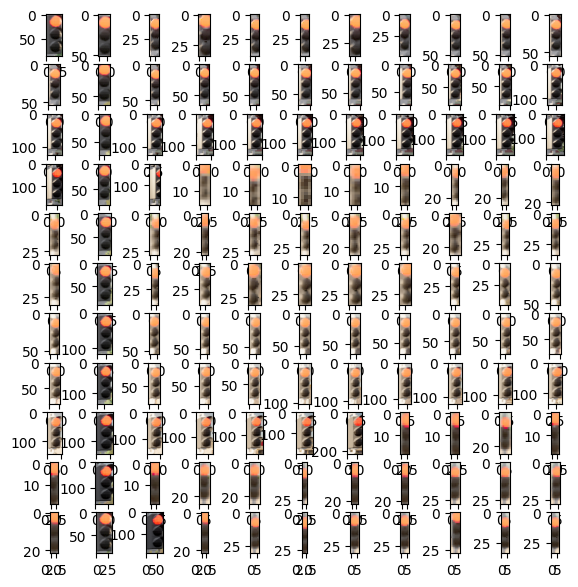

In [24]:
displayImage(imageRed)

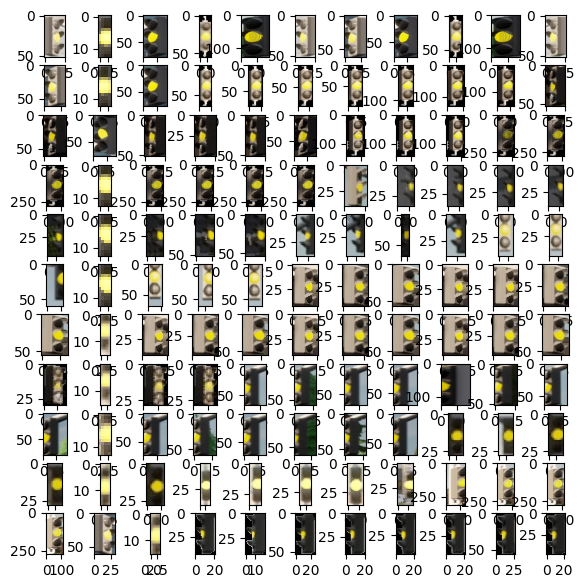

In [25]:
displayImage(imageYellow)

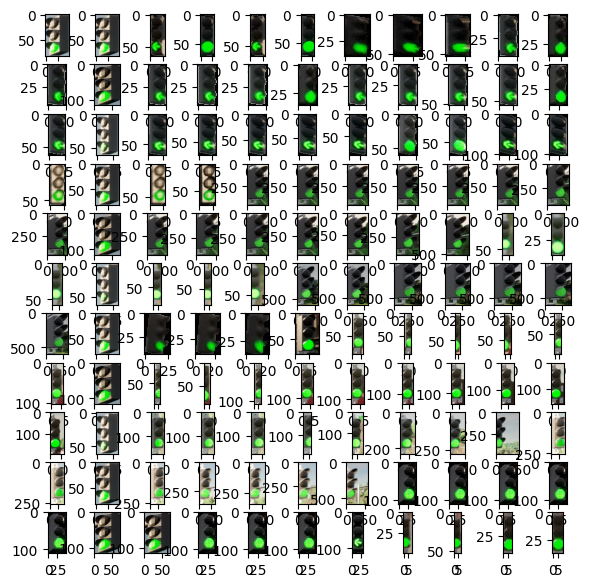

In [26]:
displayImage(imageGreen)

In [27]:
def resizeImage(images):
    images_resize = []
    for image in images:
        image_resize = cv2.resize(image,(200,400))
        images_resize.append(image_resize)
    return images_resize

Kode tersebut merupakan sebuah fungsi Python yang bernama `resizeImage`. Fungsi ini menerima satu parameter yaitu `images`, yang merupakan list dari gambar-gambar yang akan diresize.

Fungsi ini akan melakukan resize pada setiap gambar dalam list `images` dengan ukuran 200x400 menggunakan library `cv2`. Gambar-gambar yang telah diresize akan disimpan dalam list baru `images_resize`.

Fungsi ini akan mengembalikan list `images_resize` yang berisi gambar-gambar yang telah diresize.

In [28]:
imageRed_resize = resizeImage(imageRed)
imageYellow_resize = resizeImage(imageYellow)
imageGreen_resize = resizeImage(imageGreen)

In [29]:
def noiseRemoval(images):
    images_noise = []
    for image in images:
        image_noise = cv2.GaussianBlur(image, (5, 5), 0)
        images_noise.append(image_noise)
    return images_noise

Kode tersebut merupakan sebuah fungsi Python yang bernama `noiseRemoval`. Fungsi ini menerima satu parameter yaitu `images`, yang merupakan list dari gambar-gambar yang akan dihilangkan noise-nya.

Fungsi ini akan melakukan penghapusan noise pada setiap gambar dalam list `images` dengan menggunakan filter Gaussian Blur dengan ukuran kernel 5x5 menggunakan library `cv2`. Gambar-gambar yang telah dihilangkan noise-nya akan disimpan dalam list baru `images_noise`.

Fungsi ini akan mengembalikan list `images_noise` yang berisi gambar-gambar yang telah dihilangkan noise-nya.

In [30]:
noiseRed = noiseRemoval(imageRed_resize)
noiseYellow = noiseRemoval(imageYellow_resize)
noiseGreen = noiseRemoval(imageGreen_resize)

In [31]:
def contrastEnhancement(images):
    images_contrast = []
    for image in images:
        image_lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
        lab_planes = cv2.split(image_lab)
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
        lab_planes = list(lab_planes)
        lab_planes[0] = clahe.apply(lab_planes[0])
        lab_planes = tuple(lab_planes)
        image_lab = cv2.merge(lab_planes)
        image_contrast = cv2.cvtColor(image_lab, cv2.COLOR_LAB2BGR)
        images_contrast.append(image_contrast)
    return images_contrast


Kode tersebut merupakan sebuah fungsi Python yang bernama `contrastEnhancement`. Fungsi ini menerima satu parameter yaitu `images`, yang merupakan list dari gambar-gambar yang akan ditingkatkan kontrasnya.

Fungsi ini akan melakukan peningkatan kontras pada setiap gambar dalam list `images` dengan menggunakan teknik Contrast Limited Adaptive Histogram Equalization (CLAHE) menggunakan library `cv2`. 

Pada teknik CLAHE, gambar akan dibagi menjadi beberapa bagian kecil yang disebut sebagai "tiles". Setiap tile akan dihistogram equalisasikan secara independen. Hal ini dilakukan untuk menghindari efek "over-enhancement" pada gambar. 

Gambar-gambar yang telah ditingkatkan kontrasnya akan disimpan dalam list baru `images_contrast`.

Fungsi ini akan mengembalikan list `images_contrast` yang berisi gambar-gambar yang telah ditingkatkan kontrasnya.

In [32]:
def saturationEnhancement(images):
    images_saturation = []
    for image in images:
        image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
        h, s, v = cv2.split(image_hsv)
        saturation_factor = 1.5
        s = np.clip(s.astype(np.float32) * saturation_factor, 0, 255)
        s = np.clip(s, 0, 255).astype(np.uint8)
        image_hsv = cv2.merge([h, s, v])
        image_saturated = cv2.cvtColor(image_hsv, cv2.COLOR_HSV2BGR)
        images_saturation.append(image_saturated)
    return images_saturation


Kode tersebut merupakan sebuah fungsi Python yang bernama `saturationEnhancement`. Fungsi ini menerima satu parameter yaitu `images`, yang merupakan list dari gambar-gambar yang akan ditingkatkan saturasinya.

Fungsi ini akan melakukan peningkatan saturasi pada setiap gambar dalam list `images` dengan menggunakan faktor saturasi sebesar 1.5. Peningkatan saturasi dilakukan pada komponen S (Saturation) dari model warna HSV.

Setelah itu, gambar-gambar yang telah ditingkatkan saturasinya akan disimpan dalam list baru `images_saturation`.

Fungsi ini akan mengembalikan list `images_saturation` yang berisi gambar-gambar yang telah ditingkatkan saturasinya.

In [33]:
saturationRed = saturationEnhancement(noiseRed)
saturationYellow = saturationEnhancement(noiseYellow)
saturationGreen = saturationEnhancement(noiseGreen) 

In [58]:
def segmentColor(images):
    images_segment = []
    for image in images:
        image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
        lower_red = np.array([0, 100, 20])
        upper_red = np.array([179, 255, 255])
        mask_red = cv2.inRange(image_hsv, lower_red, upper_red)
        lower_green = np.array([50, 100, 100])
        upper_green = np.array([70, 255, 255])
        mask_green = cv2.inRange(image_hsv, lower_green, upper_green)
        lower_yellow = np.array([20, 100, 100])
        upper_yellow = np.array([30, 255, 255])
        mask_yellow = cv2.inRange(image_hsv, lower_yellow, upper_yellow)
        mask = mask_red + mask_green + mask_yellow
        image_segment = cv2.bitwise_and(image, image, mask=mask)
        images_segment.append(image_segment)
    return images_segment



Kode tersebut merupakan sebuah fungsi Python yang bernama `segmentColor`. Fungsi ini menerima satu parameter yaitu `images`, yang merupakan list dari gambar-gambar yang akan di-segmentasi warnanya.

Fungsi ini akan melakukan segmentasi warna pada setiap gambar dalam list `images` dengan menggunakan model warna HSV. Pada model warna HSV, warna diwakili oleh tiga komponen yaitu Hue, Saturation, dan Value. 

Fungsi ini akan melakukan segmentasi warna pada tiga warna yaitu merah, hijau, dan kuning. Setiap warna akan didefinisikan dengan range nilai HSV tertentu. 

Setelah itu, fungsi ini akan melakukan operasi bitwise AND pada ketiga mask yang telah dibuat untuk mendapatkan mask yang merepresentasikan ketiga warna tersebut. 

Gambar-gambar yang telah di-segmentasi warnanya akan disimpan dalam list baru `images_segment`.

Fungsi ini akan mengembalikan list `images_segment` yang berisi gambar-gambar yang telah di-segmentasi warnanya.

In [113]:
segmentRed = segmentColor(saturationRed)
segmentYellow = segmentColor(saturationYellow)
segmentGreen = segmentColor(saturationGreen)

In [114]:
def erodeImage(images):
    images_erode = []
    kernel = np.ones((20, 20), np.uint8)
    for image in images:
        image_erode = cv2.erode(image, kernel, iterations=1)
        images_erode.append(image_erode)
    return images_erode

Kode tersebut merupakan sebuah fungsi Python yang bernama `erodeImage`. Fungsi ini menerima satu parameter yaitu `images`, yang merupakan list dari gambar-gambar yang akan dierosi.

Fungsi ini akan melakukan operasi erosi pada setiap gambar dalam list `images` dengan menggunakan kernel berukuran 20x20 menggunakan library `cv2`. 

Setelah itu, gambar-gambar yang telah dierosi akan disimpan dalam list baru `images_erode`.

Fungsi ini akan mengembalikan list `images_erode` yang berisi gambar-gambar yang telah dierosi.

In [115]:
erosionRed = erodeImage(segmentRed)
erosionYellow = erodeImage(segmentYellow)
erosionGreen = erodeImage(segmentGreen)

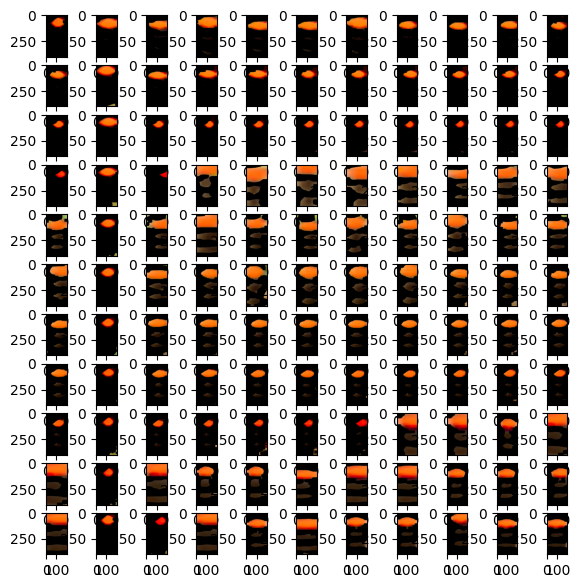

In [116]:
displayImage(erosionRed)

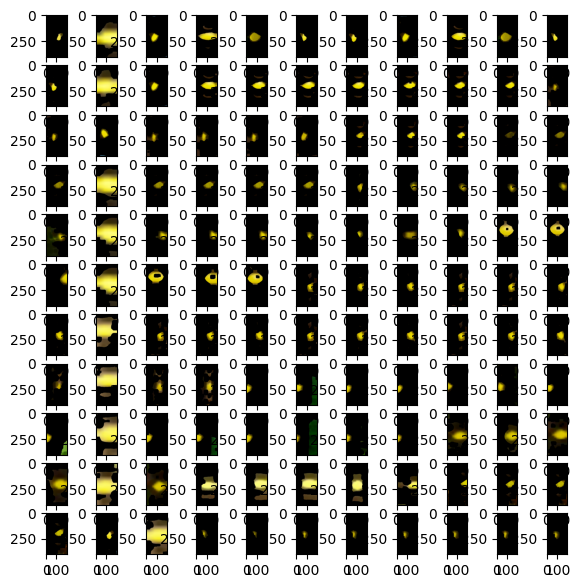

In [117]:
displayImage(erosionYellow)

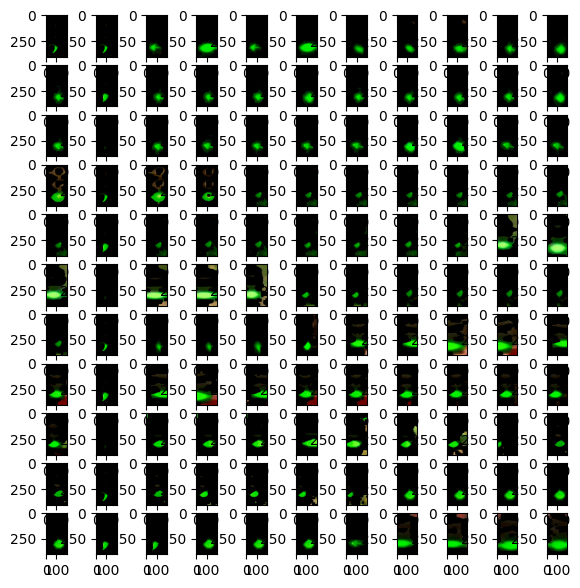

In [118]:
displayImage(erosionGreen)

In [ ]:
def saveImage(images,folder):
    for i in range(len(images)):
        cv2.imwrite(f"output/{folder}/{i}.jpg", images[i])

Kode tersebut merupakan sebuah fungsi Python yang bernama `saveImage`. Fungsi ini menerima dua parameter yaitu `images` dan `folder`. `images` adalah list dari gambar-gambar yang akan disimpan, sedangkan `folder` adalah nama folder tempat gambar-gambar tersebut akan disimpan.

Fungsi ini akan menyimpan setiap gambar dalam list `images` ke dalam folder `output` dengan nama folder yang telah ditentukan pada parameter `folder`. Setiap gambar akan diberi nama sesuai dengan indeksnya dalam list `images`.

Fungsi ini tidak mengembalikan nilai apapun, namun menyimpan gambar-gambar dalam folder `output`.

In [ ]:
saveImage(erosionRed,"red")
saveImage(erosionYellow,"yellow")
saveImage(erosionGreen,"green")

In [135]:
def recognizeTrafficLightColor(red_images, yellow_images, green_images):
    labels = [0, 1, 2]

    features = []
    target_labels = []

    for image in red_images:
        avg_color = np.mean(image, axis=(0, 1))
        features.append(avg_color)
        target_labels.append(labels[0])

    for image in yellow_images:
        avg_color = np.mean(image, axis=(0, 1))
        features.append(avg_color)
        target_labels.append(labels[1])

    for image in green_images:
        avg_color = np.mean(image, axis=(0, 1))
        features.append(avg_color)
        target_labels.append(labels[2])

    X_train, X_test, y_train, y_test = train_test_split(features, target_labels, test_size=0.1, random_state=42)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)

    model = KNeighborsClassifier(n_neighbors=3)
    model.fit(X_train, y_train)

    return model, scaler

Kode tersebut merupakan sebuah fungsi Python yang bernama `recognizeTrafficLightColor`. Fungsi ini menerima tiga parameter yaitu `red_images`, `yellow_images`, dan `green_images`, yang merupakan list dari gambar-gambar yang akan digunakan untuk pengenalan warna pada lampu lalu lintas.

Fungsi ini akan melakukan pengenalan warna pada gambar-gambar tersebut dengan menggunakan rata-rata warna dari setiap gambar. Rata-rata warna tersebut akan dijadikan sebagai fitur untuk pengenalan warna.

Setelah itu, fungsi ini akan membagi data menjadi data latih dan data uji dengan menggunakan fungsi `train_test_split` dari library `sklearn`. Data latih akan digunakan untuk melatih model pengenalan warna, sedangkan data uji akan digunakan untuk menguji performa model.

Fungsi ini akan mengembalikan model pengenalan warna dan scaler yang digunakan untuk pengenalan warna tersebut. Model pengenalan warna yang digunakan adalah K-Nearest Neighbors (KNN) dengan jumlah tetangga sebanyak 3.

In [136]:
model, scaler = recognizeTrafficLightColor(erosionRed, erosionYellow, erosionGreen)  

In [137]:
def allProcess(images):
    images_resize = resizeImage(images)
    images_noise = noiseRemoval(images_resize)
    images_contrast = contrastEnhancement(images_noise)
    images_saturation = saturationEnhancement(images_contrast)
    images_segment = segmentColor(images_saturation)
    images_erode = erodeImage(images_segment)
    return images_erode

Kode tersebut merupakan sebuah fungsi Python yang bernama `allProcess`. Fungsi ini menerima satu parameter yaitu `images`, yang merupakan list dari gambar-gambar yang akan diproses.

Fungsi ini akan melakukan beberapa tahapan pemrosesan gambar pada setiap gambar dalam list `images`. Tahapan pemrosesan tersebut meliputi resize gambar, penghapusan noise, peningkatan kontras, peningkatan saturasi, segmentasi warna, dan erosi gambar.

Setelah itu, gambar-gambar yang telah diproses akan disimpan dalam list baru `images_erode`.

Fungsi ini akan mengembalikan list `images_erode` yang berisi gambar-gambar yang telah diproses.

In [138]:
def predictRandomTrafficLightColor(images, model, scaler):
    predict = []
    for image in images:
        avg_color = np.mean(image, axis=(0, 1))
        scaled_color = scaler.transform([avg_color])
        predicted_label = model.predict(scaled_color)
        if predicted_label[0] == 0:
            predict.append("red")
        elif predicted_label[0] == 1:
            predict.append("yellow")
        elif predicted_label[0] == 2:
            predict.append("green")
        else:
            predict.append("unknown")
    return predict

Kode tersebut merupakan sebuah fungsi Python yang bernama `predictRandomTrafficLightColor`. Fungsi ini menerima tiga parameter yaitu `images`, `model`, dan `scaler`.

Fungsi ini akan melakukan prediksi warna pada setiap gambar dalam list `images` dengan menggunakan model pengenalan warna yang telah dilatih sebelumnya. Untuk setiap gambar, fungsi ini akan menghitung rata-rata warna dari gambar tersebut dan melakukan transformasi scaler pada rata-rata warna tersebut. Setelah itu, fungsi ini akan melakukan prediksi warna pada rata-rata warna tersebut menggunakan model pengenalan warna.

Hasil prediksi warna tersebut akan disimpan dalam list `predict`. Jika warna yang diprediksi adalah 0, maka warna tersebut adalah merah. Jika warna yang diprediksi adalah 1, maka warna tersebut adalah kuning. Jika warna yang diprediksi adalah 2, maka warna tersebut adalah hijau. Jika warna yang diprediksi tidak dikenali, maka warna tersebut adalah unknown.

Fungsi ini akan mengembalikan list `predict` yang berisi hasil prediksi warna pada setiap gambar dalam list `images`.

In [147]:
def randImage():
    folder = ["red", "yellow", "green"]
    real_color = []
    random_images = []
    for i in range(121):    
        folder_rand = random.choice(folder)
        real_color.append(folder_rand)
        path = f"traffic_light_data/val/{folder_rand}/"
        random_image = random.choice(os.listdir(path))
        random_image_path = os.path.join(path, random_image)
        random_image = cv2.imread(random_image_path)
        random_images.append(random_image)
    return random_images, real_color

Kode tersebut merupakan sebuah fungsi Python yang bernama `randImage`. Fungsi ini tidak menerima parameter apapun.

Fungsi ini akan memilih secara acak 121 gambar dari folder `red`, `yellow`, dan `green` yang terdapat pada direktori `traffic_light_data/val`. Setiap folder akan dipilih sebanyak 40 gambar secara acak. 

Setelah itu, fungsi ini akan membaca setiap gambar yang telah dipilih menggunakan library `cv2` dan menyimpannya dalam list `random_images`. Fungsi ini juga akan menyimpan warna asli dari setiap gambar dalam list `real_color`.

Fungsi ini akan mengembalikan list `random_images` yang berisi 121 gambar yang telah dipilih secara acak dan list `real_color` yang berisi warna asli dari setiap gambar.

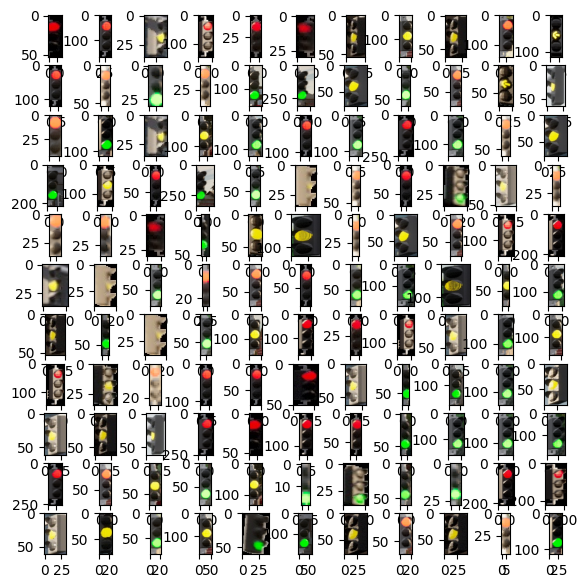

In [148]:
random_images,real_color = randImage()
displayImage(random_images)
random_images = allProcess(random_images)


In [149]:
predicted_color = predictRandomTrafficLightColor(random_images, model, scaler)
print("real\t:",real_color)
print("predict\t:",predicted_color)

real	: ['red', 'red', 'yellow', 'red', 'red', 'red', 'yellow', 'yellow', 'yellow', 'red', 'yellow', 'red', 'red', 'green', 'red', 'green', 'green', 'yellow', 'green', 'red', 'yellow', 'yellow', 'red', 'green', 'yellow', 'yellow', 'green', 'red', 'green', 'red', 'green', 'red', 'yellow', 'green', 'yellow', 'red', 'green', 'green', 'yellow', 'red', 'red', 'green', 'yellow', 'red', 'red', 'red', 'red', 'green', 'yellow', 'yellow', 'red', 'yellow', 'red', 'red', 'red', 'yellow', 'yellow', 'green', 'red', 'red', 'red', 'green', 'green', 'yellow', 'yellow', 'green', 'yellow', 'green', 'yellow', 'green', 'yellow', 'red', 'red', 'red', 'yellow', 'green', 'yellow', 'red', 'yellow', 'red', 'red', 'red', 'red', 'yellow', 'green', 'green', 'green', 'yellow', 'yellow', 'yellow', 'yellow', 'red', 'red', 'red', 'red', 'green', 'green', 'green', 'green', 'red', 'red', 'yellow', 'green', 'yellow', 'green', 'green', 'green', 'green', 'red', 'red', 'yellow', 'yellow', 'green', 'yellow', 'green', 'green',

In [150]:
model2, scaler2 = recognizeTrafficLightColor(imageRed, imageYellow, imageGreen)
predicted_color2 = predictRandomTrafficLightColor(random_images, model2, scaler2)

In [151]:
def calculateAccuracy(real_color, predicted_color):
    correct = 0
    for i in range(len(real_color)):
        if real_color[i] == predicted_color[i]:
            correct += 1
    accuracy = correct / len(real_color)
    return accuracy

Kode tersebut merupakan sebuah fungsi Python yang bernama `calculateAccuracy`. Fungsi ini menerima dua parameter yaitu `real_color` dan `predicted_color`, yang merupakan list dari warna asli dan warna yang diprediksi pada setiap gambar.

Fungsi ini akan menghitung akurasi prediksi warna pada setiap gambar dengan membandingkan warna asli dengan warna yang diprediksi. Jika warna yang diprediksi sama dengan warna asli, maka prediksi dianggap benar. Jumlah prediksi yang benar akan dihitung dan dibagi dengan jumlah total gambar untuk mendapatkan akurasi prediksi.

Fungsi ini akan mengembalikan nilai akurasi prediksi.

In [152]:
accuracy = calculateAccuracy(real_color, predicted_color)
print("accuracy dengan preprocessing:",accuracy)

accuracy dengan preprocessing: 0.9834710743801653


In [153]:
accuracy2 = calculateAccuracy(real_color, predicted_color2)
print("accuracy2 tanpa preprocessing:",accuracy2)

accuracy2 tanpa preprocessing: 0.2975206611570248


Variabel `accuracy` dan `accuracy2` merupakan hasil akurasi prediksi warna pada gambar-gambar yang berbeda.

Variabel `accuracy` merupakan hasil akurasi prediksi warna pada gambar-gambar yang telah diproses dengan tahapan preprocessing. Tahapan preprocessing yang dilakukan pada gambar-gambar tersebut meliputi resize gambar, penghapusan noise, peningkatan kontras, peningkatan saturasi, segmentasi warna, dan erosi gambar. Hasil akurasi prediksi pada gambar-gambar yang telah diproses dengan tahapan preprocessing adalah sebesar 0.9834 atau sekitar 98.34%.

Variabel `accuracy2` merupakan hasil akurasi prediksi warna pada gambar-gambar yang tidak diproses dengan tahapan preprocessing. Hasil akurasi prediksi pada gambar-gambar yang tidak diproses dengan tahapan preprocessing adalah sebesar 0.2975 atau sekitar 29.75%.

Dari hasil tersebut, dapat disimpulkan bahwa tahapan preprocessing yang dilakukan pada gambar-gambar dapat meningkatkan performa model pengenalan warna. Hal ini disebabkan karena tahapan preprocessing dapat membantu menghilangkan noise pada gambar, meningkatkan kontras dan saturasi, serta memperjelas segmentasi warna pada gambar. Sehingga, model pengenalan warna dapat lebih mudah dan akurat dalam mengenali warna pada gambar.